Kelayakan Kredit: 82.38


C:\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


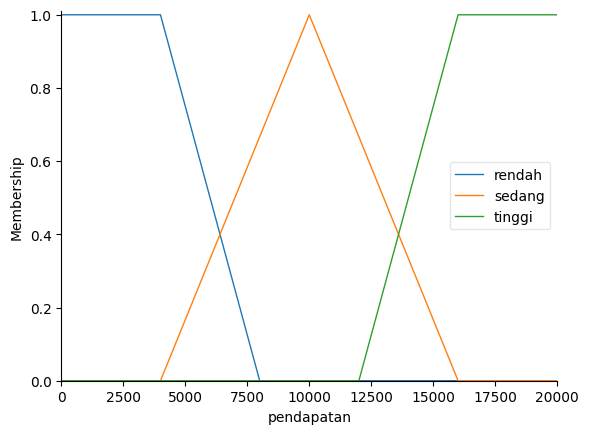

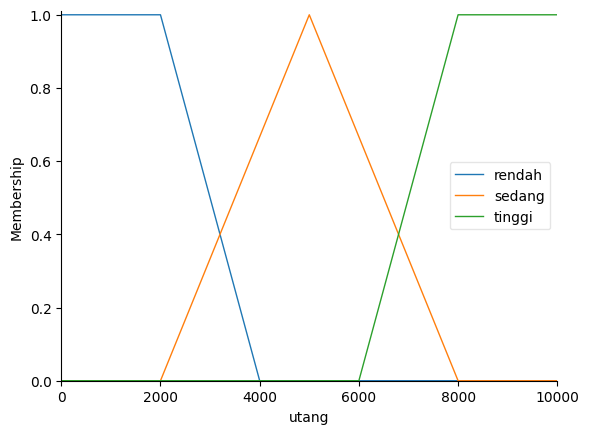

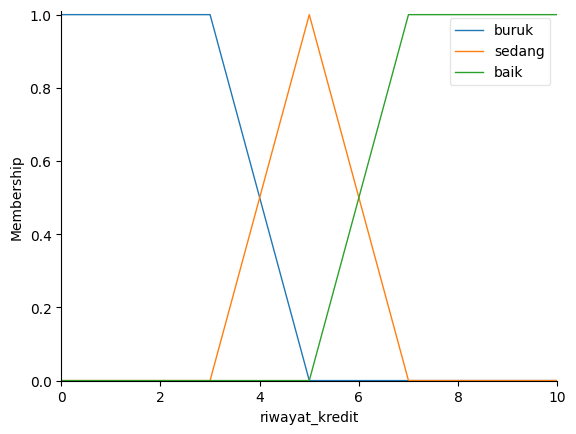

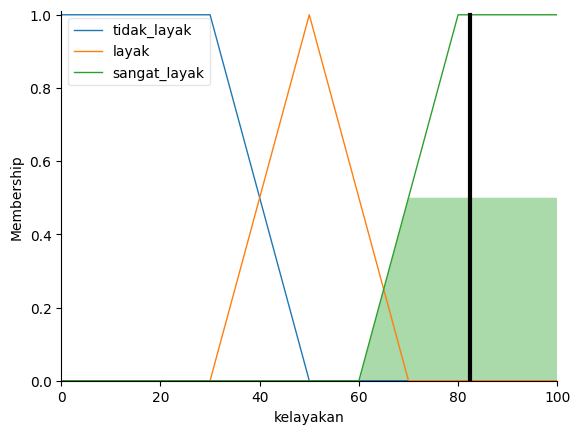

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Step 1: Define Fuzzy Variables
# Input Variables
pendapatan = ctrl.Antecedent(np.arange(0, 20001, 1000), 'pendapatan')  # Pendapatan bulanan (0 - 20,000)
utang = ctrl.Antecedent(np.arange(0, 10001, 500), 'utang')  # Utang (0 - 10,000)
riwayat_kredit = ctrl.Antecedent(np.arange(0, 11, 1), 'riwayat_kredit')  # Riwayat Kredit (0 - 10)

# Output Variable
kelayakan = ctrl.Consequent(np.arange(0, 101, 1), 'kelayakan')  # Kelayakan Kredit (0 - 100)

# Step 2: Define Membership Functions
# Membership for Pendapatan
pendapatan['rendah'] = fuzz.trapmf(pendapatan.universe, [0, 0, 4000, 8000])
pendapatan['sedang'] = fuzz.trimf(pendapatan.universe, [4000, 10000, 16000])
pendapatan['tinggi'] = fuzz.trapmf(pendapatan.universe, [12000, 16000, 20000, 20000])

# Membership for Utang
utang['rendah'] = fuzz.trapmf(utang.universe, [0, 0, 2000, 4000])
utang['sedang'] = fuzz.trimf(utang.universe, [2000, 5000, 8000])
utang['tinggi'] = fuzz.trapmf(utang.universe, [6000, 8000, 10000, 10000])

# Membership for Riwayat Kredit
riwayat_kredit['buruk'] = fuzz.trapmf(riwayat_kredit.universe, [0, 0, 3, 5])
riwayat_kredit['sedang'] = fuzz.trimf(riwayat_kredit.universe, [3, 5, 7])
riwayat_kredit['baik'] = fuzz.trapmf(riwayat_kredit.universe, [5, 7, 10, 10])

# Membership for Kelayakan Kredit
kelayakan['tidak_layak'] = fuzz.trapmf(kelayakan.universe, [0, 0, 30, 50])
kelayakan['layak'] = fuzz.trimf(kelayakan.universe, [30, 50, 70])
kelayakan['sangat_layak'] = fuzz.trapmf(kelayakan.universe, [60, 80, 100, 100])

# Step 3: Define Fuzzy Rules
rule1 = ctrl.Rule(pendapatan['rendah'] & utang['tinggi'] & riwayat_kredit['buruk'], kelayakan['tidak_layak'])
rule2 = ctrl.Rule(pendapatan['rendah'] & utang['rendah'] & riwayat_kredit['baik'], kelayakan['layak'])
rule3 = ctrl.Rule(pendapatan['tinggi'] & utang['rendah'] & riwayat_kredit['baik'], kelayakan['sangat_layak'])
rule4 = ctrl.Rule(pendapatan['sedang'] & utang['sedang'] & riwayat_kredit['sedang'], kelayakan['layak'])
rule5 = ctrl.Rule(pendapatan['tinggi'] & utang['tinggi'] & riwayat_kredit['buruk'], kelayakan['tidak_layak'])
rule6 = ctrl.Rule(pendapatan['tinggi'] & utang['rendah'] & riwayat_kredit['sedang'], kelayakan['sangat_layak'])

# Step 4: Build Control System
kelayakan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
kelayakan_simulasi = ctrl.ControlSystemSimulation(kelayakan_ctrl)

# Step 5: Input Example
kelayakan_simulasi.input['pendapatan'] = 15000
kelayakan_simulasi.input['utang'] = 3000
kelayakan_simulasi.input['riwayat_kredit'] = 8

# Step 6: Compute
kelayakan_simulasi.compute()
print(f"Kelayakan Kredit: {kelayakan_simulasi.output['kelayakan']:.2f}")

# Step 7: Visualize
pendapatan.view()
utang.view()
riwayat_kredit.view()
kelayakan.view(sim=kelayakan_simulasi)
